# Lecture 18: Image Processing with Machine Learning

In this notebook, we will start exploring image processing and machine learning. We'll start by understanding how images, both in black and white (grayscale) and color, are represented as data. 

After, in a hands-on activity, the MNIST dataset, a collection of handwritten digits, will be used to train a Random Forest classifier. This exercise aims to illustrate the practical application of machine learning models in interpreting and classifying image data.

By the end of this notebook, you should have a introduction to:
- How digital images are structured as data.
- The process of converting images into a format suitable for machine learning.
- Training a machine learning model using image data.
- Evaluating the model's performance in classifying images.


### Set up imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import data
from skimage.color import rgb2gray
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### Load built-in image from skimage

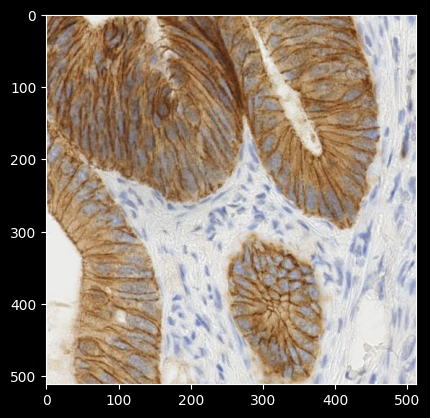

In [3]:
# load an microscope image of a immunohistochemistry from skimage.data
image = data.immunohistochemistry()

# display the image
plt.imshow(image)

### Grayscale images

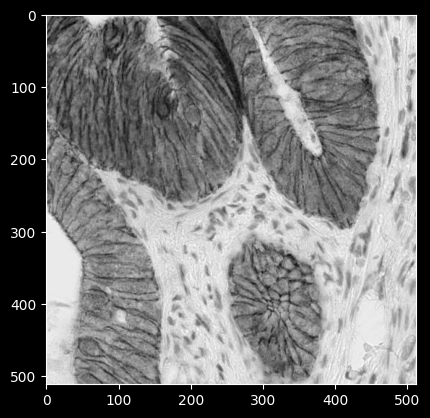

In [5]:
# convert the image to grayscale
image_gray = rgb2gray(image)

# display the image
plt.imshow(image_gray, cmap='gray')


In [7]:
# look at the data of the image
print(image_gray.shape)

# look at the data of the image
image_gray


(512, 512)


array([[0.4839502 , 0.51140118, 0.47833922, ..., 0.63096314, 0.69032235,
        0.77099373],
       [0.43158588, 0.44335059, 0.42316941, ..., 0.67802196, 0.68247922,
        0.71580902],
       [0.37895373, 0.40640471, 0.42404039, ..., 0.71163451, 0.67295451,
        0.67210627],
       ...,
       [0.85485725, 0.8744651 , 0.90583765, ..., 0.82715333, 0.82601451,
        0.83777922],
       [0.83973647, 0.85934431, 0.89071686, ..., 0.83556196, 0.8142498 ,
        0.82684784],
       [0.85934431, 0.85934431, 0.86718745, ..., 0.81987569, 0.80724   ,
        0.82684784]])

In [8]:
# convert the image to a dataframe
gray_df = pd.DataFrame(image_gray)


# inspect the grayscale dataframe
gray_df

,0,1,2,3,4,5,6,7,8,9,...,502,503,504,505,506,507,508,509,510,511
0,0.483950,0.511401,0.478339,0.427359,0.423735,0.478637,0.473309,0.508603,0.518410,0.428214,...,0.729523,0.677151,0.636551,0.657558,0.702400,0.671027,0.603795,0.630963,0.690322,0.770994
1,0.431586,0.443351,0.423169,0.403562,0.423735,0.502732,0.485073,0.486755,0.463508,0.346427,...,0.721680,0.665386,0.609100,0.626185,0.690635,0.694556,0.650854,0.678022,0.682479,0.715809
2,0.378954,0.406405,0.424040,0.454006,0.508908,0.504413,0.471069,0.459587,0.428214,0.315054,...,0.714120,0.661465,0.589493,0.594813,0.671027,0.706321,0.682226,0.711635,0.672955,0.672106
3,0.360782,0.382340,0.451789,0.499681,0.503603,0.466336,0.496853,0.439979,0.295446,0.197407,...,0.682747,0.642422,0.630107,0.607143,0.611065,0.670462,0.740767,0.718912,0.719731,0.703479
4,0.418222,0.445673,0.492426,0.526582,0.536374,0.494070,0.485088,0.390971,0.255665,0.228780,...,0.669576,0.630940,0.622829,0.611065,0.614986,0.665401,0.731242,0.730111,0.738773,0.729248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.897995,0.854857,0.854857,0.858779,0.862700,0.886230,0.909759,0.909759,0.890151,0.905838,...,0.850980,0.873944,0.846493,0.819042,0.858258,0.881787,0.840890,0.833047,0.893537,0.909224
508,0.878387,0.874465,0.886230,0.886230,0.870544,0.870544,0.890717,0.886795,0.874465,0.894073,...,0.823529,0.811765,0.775905,0.744533,0.788235,0.834729,0.819310,0.827153,0.861309,0.880916
509,0.854857,0.874465,0.905838,0.901916,0.886230,0.874465,0.882874,0.871109,0.854857,0.874465,...,0.784879,0.768627,0.752941,0.728846,0.768627,0.823529,0.823797,0.827153,0.826015,0.837779
510,0.839736,0.859344,0.890717,0.894638,0.886795,0.898560,0.894638,0.875031,0.855423,0.867187,...,0.753507,0.768627,0.796078,0.800000,0.823529,0.858824,0.847327,0.835562,0.814250,0.826848


### Plot the first column as a line plot

<Axes: >

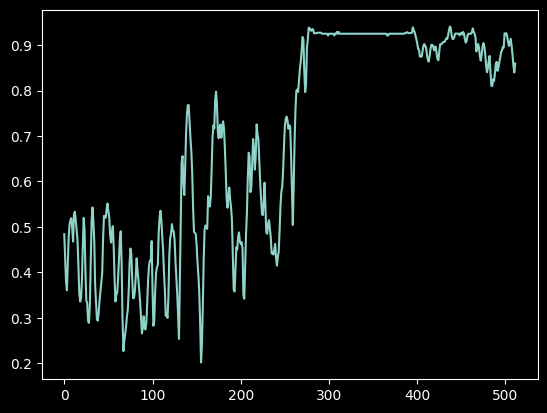

In [10]:
# Plot the first column as a line plot
first_col = gray_df.iloc[:, 0]

first_col.plot()

### Color images

In [11]:
# look at color image data
image

array([[[156, 118,  81],
        [163, 125,  88],
        [156, 116,  81],
        ...,
        [152, 160, 196],
        [169, 175, 207],
        [189, 196, 225]],

       [[141, 105,  69],
        [144, 108,  72],
        [141, 102,  69],
        ...,
        [164, 172, 208],
        [167, 173, 205],
        [175, 182, 210]],

       [[125,  92,  59],
        [132,  99,  66],
        [138, 103,  71],
        ...,
        [172, 181, 214],
        [164, 171, 200],
        [164, 171, 197]],

       ...,

       [[221, 218, 209],
        [226, 223, 214],
        [234, 231, 222],
        ...,
        [212, 211, 207],
        [214, 210, 207],
        [217, 213, 210]],

       [[217, 214, 207],
        [222, 219, 212],
        [230, 227, 220],
        ...,
        [214, 213, 211],
        [211, 207, 204],
        [215, 210, 207]],

       [[222, 219, 212],
        [222, 219, 212],
        [224, 221, 214],
        ...,
        [210, 209, 207],
        [210, 205, 202],
        [215, 210, 207]]

In [12]:
# look at the shape of the color image data
image.shape

(512, 512, 3)

In [14]:
# isolate the red, green, and blue channels
R, G, B = image[:, :, 0], image[:, :, 1], image[:, :, 2]

# look at the red channel
R.shape


(512, 512)

In [15]:
# inspect what the ravel function does
image.ravel().shape

(786432,)

(array([9.000e+00, 3.000e+00, 2.000e+00, 4.000e+00, 3.000e+00, 7.000e+00,
        1.100e+01, 8.000e+00, 1.500e+01, 1.800e+01, 2.700e+01, 3.200e+01,
        3.400e+01, 3.700e+01, 5.400e+01, 4.600e+01, 6.000e+01, 6.200e+01,
        7.300e+01, 1.100e+02, 9.700e+01, 1.080e+02, 1.210e+02, 1.500e+02,
        1.690e+02, 1.910e+02, 1.950e+02, 2.250e+02, 2.050e+02, 2.780e+02,
        2.920e+02, 3.020e+02, 3.260e+02, 3.540e+02, 3.900e+02, 4.060e+02,
        3.880e+02, 4.120e+02, 4.720e+02, 4.830e+02, 4.990e+02, 5.260e+02,
        5.250e+02, 5.940e+02, 6.510e+02, 6.180e+02, 6.640e+02, 7.000e+02,
        6.900e+02, 8.170e+02, 7.890e+02, 8.550e+02, 8.320e+02, 8.840e+02,
        9.290e+02, 9.620e+02, 9.830e+02, 1.043e+03, 1.033e+03, 1.034e+03,
        1.146e+03, 1.123e+03, 1.087e+03, 1.157e+03, 1.266e+03, 1.288e+03,
        1.290e+03, 1.311e+03, 1.339e+03, 1.297e+03, 1.426e+03, 1.402e+03,
        1.406e+03, 1.512e+03, 1.566e+03, 1.562e+03, 1.576e+03, 1.573e+03,
        1.619e+03, 1.593e+03, 1.623e+0

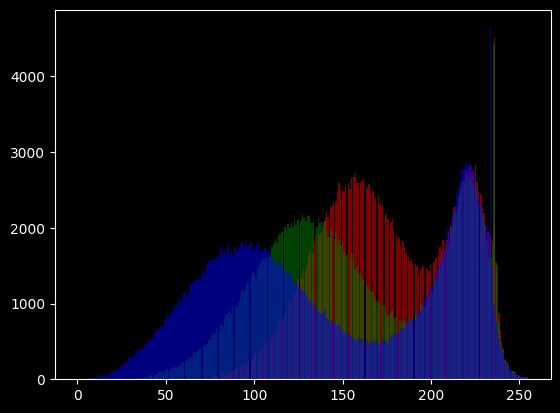

In [18]:
# plot a histogram of the red, green, and blue channels
plt.hist(R.ravel(), bins=256, color='red', alpha=0.5)
plt.hist(G.ravel(), bins=256, color='green', alpha=0.5)
plt.hist(B.ravel(), bins=256, color='blue', alpha=0.5)

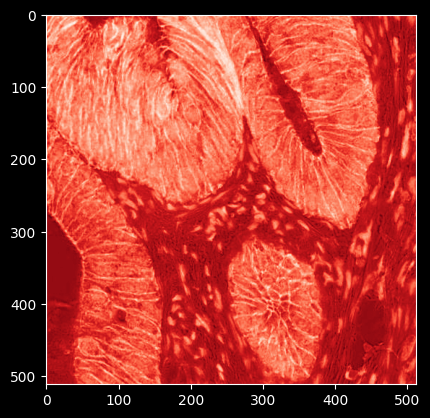

In [19]:
# plot red image
plt.imshow(R, cmap='Reds')

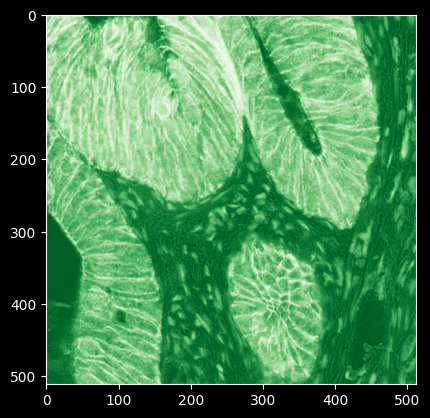

In [20]:
# plot green image
plt.imshow(G, cmap='Greens')

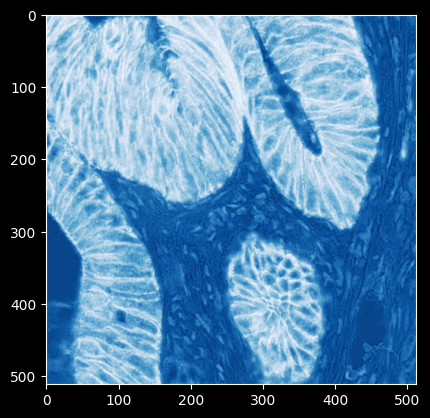

In [21]:
# plot blue image
plt.imshow(B, cmap='Blues')

## Machine Learning Model Training Activity

**Objective**: In this activity, our goal is to apply what we've learned about image data representation to a practical machine learning task. We will use the MNIST dataset, which consists of thousands of handwritten digits, as our data source. Our challenge is to train a Random Forest classifier to accurately predict the digits based on their image data.

### Steps:
1. **Load the MNIST dataset**: We'll start by loading the dataset, which has been pre-split into features (`X`) and labels (`y`).
2. **Inspect the dataset**: It's always a good idea to visually inspect the first image in the dataset and understand its structure.
3. **Prepare the data**: We will perform a train-test split, reserving 20% of the dataset for testing our model.
4. **Train a Random Forest classifier**: Using the training data, we'll train a Random Forest model with specified hyperparameters.
5. **Evaluate the model's performance**: After training, we'll test the model on the unseen test data to assess its accuracy.
6. **Analyze misclassifications**: Finally, we'll dive deeper into the model's predictions, identifying the most commonly misclassified digits and analyzing possible reasons for these errors.


### Load mnist data set

In [22]:
# load mnist data
mnist = fetch_openml('mnist_784')

X, y = mnist["data"], mnist["target"]

In [26]:
# display the X dataframe
print(X.shape)

X

(70000, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# display the y series
print(y.shape)

y

(70000,)


0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: category
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [29]:
assert X.shape == (70000, 784)
assert y.shape == (70000,)

### Inspect first image

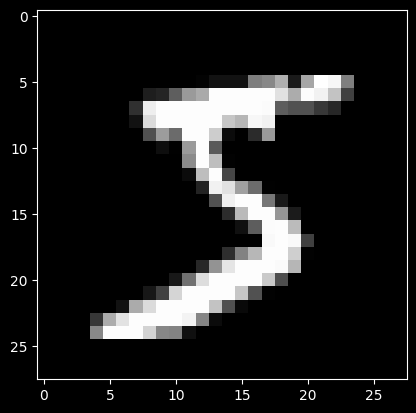

In [23]:
first_image_data = list(X.iloc[0])
first_image = np.array(first_image_data).reshape(28, 28)

plt.imshow(first_image, cmap="gray")

In [31]:
# print the label of the first image
first_label = y[0]

In [ ]:
assert first_label == '5'

### Run train-test split
Save 20% of data for testing

In [32]:
# Run train-test split, and save 20% of data for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [33]:
assert X_train.shape == (56000, 784)
assert X_test.shape == (14000, 784)
assert y_train.shape == (56000,)
assert y_test.shape == (14000,)

### Train a random forest classifier model 
Use the hyperparameters n_estimators = 100, and random state = 42

In [44]:
# Train a random forest classifier on the training data
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Evaluate the model's performance
Make predictions for the testing data, and use the scikit learn function `accuracy_score` to evalute the model.

In [45]:
# Predict the labels of the test data and calculate the accuracy
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9692857142857143


In [47]:
assert accuracy == 0.967

AssertionError: 

#

### Determine the most commonly misclassified digit

In [48]:
# loop over y_test and y_pred and print the first 10 mismatches
mismatches = 0
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label != predicted_label and mismatches < 10:
        print(f"True label: {true_label}, Predicted label: {predicted_label}")
        mismatches += 1


True label: 6, Predicted label: 0
True label: 7, Predicted label: 2
True label: 9, Predicted label: 4
True label: 5, Predicted label: 6
True label: 7, Predicted label: 0
True label: 7, Predicted label: 1
True label: 7, Predicted label: 9
True label: 6, Predicted label: 1
True label: 8, Predicted label: 6
True label: 7, Predicted label: 9


In [50]:
# now make a dictionary where keys are digits, and values are the total number of mismatches for that digit
mismatch_dictionary = {}
for true_label, predicted_label in zip(y_test, y_pred):
    if true_label != predicted_label:
        if true_label in mismatch_dictionary:
            mismatch_dictionary[true_label] += 1
        else:
            mismatch_dictionary[true_label] = 1

mismatch_dictionary

{'6': 23,
 '7': 56,
 '9': 63,
 '5': 49,
 '8': 64,
 '2': 37,
 '3': 54,
 '4': 47,
 '1': 21,
 '0': 16}

In [51]:
assert mismatch_dictionary['0'] == 20
assert mismatch_dictionary['9'] == 73

AssertionError: 

### End of Activity